In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create the dataset
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)


df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
# Calculate the entropy at the root node
class_counts = df['buys_computer'].value_counts()
class_probabilities = class_counts / len(df)
root_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))

# Calculate the entropy and information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
entropies = []
information_gains = []

for attribute in attributes:
    attribute_entropy = 0
    attribute_information_gain = 0

    # Split the dataset based on the unique values of the attribute
    attribute_values = df[attribute].unique()
    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_class_counts = subset['buys_computer'].value_counts()
        subset_class_probabilities = subset_class_counts / len(subset)
        subset_entropy = -np.sum(subset_class_probabilities * np.log2(subset_class_probabilities))
        attribute_entropy += (len(subset) / len(df)) * subset_entropy

    # Calculate the information gain for the attribute
    attribute_information_gain = root_entropy - attribute_entropy

    entropies.append(attribute_entropy)
    information_gains.append(attribute_information_gain)
# Find the attribute with the highest Information Gain (the root node)
root_node_index = np.argmax(information_gains)
root_node_attribute = attributes[root_node_index]
root_node_information_gain = information_gains[root_node_index]

print(f"The root node is '{root_node_attribute}' with Information Gain {root_node_information_gain:.4f}")

# Print the entropies and information gains
for i in range(len(attributes)):
    print(f"Entropy for {attributes[i]}: {entropies[i]}")
    print(f"Information Gain for {attributes[i]}: {information_gains[i]}")

The root node is 'age' with Information Gain 0.2467
Entropy for age: 0.6935361388961918
Information Gain for age: 0.24674981977443933
Entropy for income: 0.9110633930116763
Information Gain for income: 0.02922256565895487
Entropy for student: 0.7884504573082896
Information Gain for student: 0.15183550136234159
Entropy for credit_rating: 0.8921589282623617
Information Gain for credit_rating: 0.04812703040826949


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Calculate the depth of the constructed tree
depth = clf.get_depth()
print("Depth of the Decision Tree:", depth)

Depth of the Decision Tree: 4


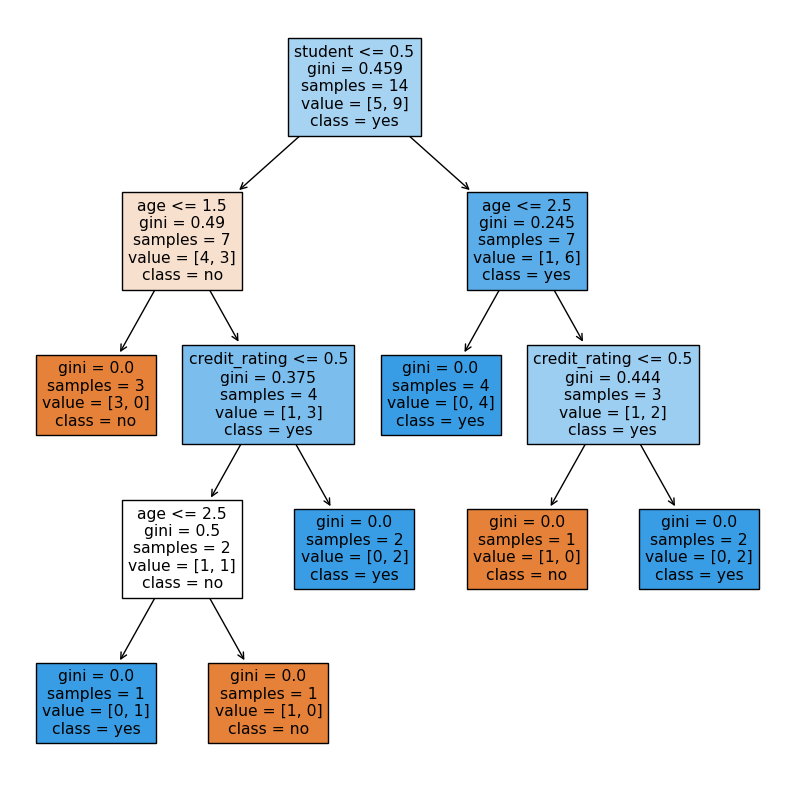

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree
# Convert categorical variables to numerical
age_num = [1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3]
income_num = [2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1]
student_num = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
credit_rating_num = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
buys_computer_num = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

 

# Combine the numerical features into a single feature matrix
X = list(zip(age_num, income_num, student_num, credit_rating_num))

 

# Combine the target variable into a single target vector
y = buys_computer_num

 

# Construct the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X, y)

 

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['no', 'yes'])
plt.show()